## Supervised ML & Sentiment Analysis

### Keyword

<div style="display:flex;justify-content:space-between;">
<div style="width:50%;">
    1. Vocabulary
    2. Sentiment Analysis
    3. Corpus
</div>
<div>
    <img src="../assets/images/3.png" alt=""/>
</div>
</div>

### Vocalbulary & Feature Extraction

Cách đơn giản nhất để biểu diễn feature của các câu đó là xây dựng vector từ bằng cách:

- Tìm ra các từ duy nhất (vocabulary) trong các câu ta được vector n chiều: $[n_1, n_2, n_3, ...n_n]$
- Mỗi câu sẽ biểu diễn bằng vector từ vựng trên với giá trị tại phần tử thứ i là số lần xuất hiện của từ đó trong câu

In [11]:
# Ví dụ

sentences = ['I am happy because I am learning NLP', 'I hated that movie', 'I love working at DL']

# Xây dựng từ điển
vocab = set(' '.join(sentences).split(' '))

print("Len: ", len(vocab))
print("Vocal: ", vocab)

Len:  13
Vocal:  {'happy', 'learning', 'DL', 'that', 'hated', 'because', 'love', 'I', 'working', 'at', 'movie', 'am', 'NLP'}


![](../assets/images/1.png)

In [14]:
list(vocab).count('happy')

1

In [18]:
def text2vect(text):
    result = [text.split(' ').count(word) for word in list(vocab)]
    return result
    
    
print(f"Sentence {sentences[0]} represent in vector: {text2vect(sentences[0])}")
print(f"Sentence {sentences[1]} represent in vector: {text2vect(sentences[1])}")
print(f"Sentence {sentences[2]} represent in vector: {text2vect(sentences[2])}")

Sentence I am happy because I am learning NLP represent in vector: [1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1]
Sentence I hated that movie represent in vector: [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]
Sentence I love working at DL represent in vector: [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0]


![](../assets/images/2.png)

### Negative and Positive Frequencies

<div style="display:flex;">
    <img src="../assets/images/4.png" style="flex:1;width:30%;"/>
    <img src="../assets/images/5.png" style="flex:1;width:30%;"/>
    <img src="../assets/images/6.png" style="flex:1;width:30%;"/>
</div>

### Feature extraction with Frequencies

Xây dựng vector features với số chiều bằng 3:
![](../assets/images/7.png)

- Trong đó phần tử thứ 2 là tổng tần số (lấy ra từ frequencies dict) của các từ positive xuất hiện trong câu
- Phần tử thứ 3 là tổng tần số của các từ negative xuất hiện trong câu


Ví dụ với câu: I am sad, I am not learning NLP

<div style="display:flex;">
    <img src="../assets/images/8.png" style="width:50%;"/>
    <img src="../assets/images/9.png" style="width:50%;"/>
</div>

Như vậy câu đã cho có vector feature là : [1, 8, 11]

### Preprocessing: stop words and punctuation

delete all stop words and punctuation

<div style="display:flex;">
    <img src="../assets/images/10.png" style="width:50%;"/>
    <img src="../assets/images/11.png" style="width:50%;"/>
</div>

### Preprocessing: handles and URLs

![](../assets/images/12.png)

### Preprocessing: Stemming and lowercasing

![](../assets/images/13.png)

Putting together to get matrix:

![](../assets/images/14.png)

In [20]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [21]:
nltk.download("twitter_samples")

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\hoang\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

## Load and explore data

In [24]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [25]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


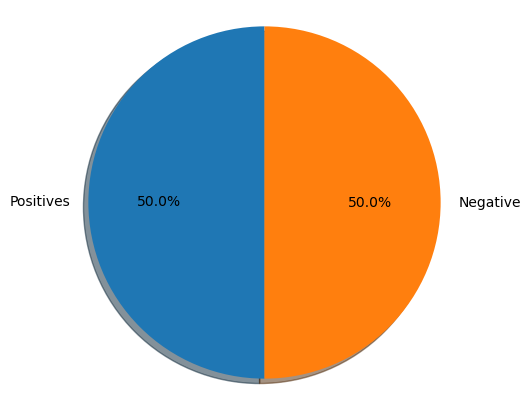

In [26]:
fig = plt.figure(figsize=(5, 5))

labels = 'Positives', "Negative"

sizes = [len(all_positive_tweets), len(all_negative_tweets)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')


plt.show()

In [34]:
print('\033[92m' + all_positive_tweets[random.randint(0, 5000)])

print('\033[91m' + all_negative_tweets[random.randint(0, 5000)])

@monolifemusic @DJANORAK I'm getting there! It's been super slow because of the move. Definitely want a Mono Life remix when it's done :-))
@InfinitelySY Yeah, I've heard :( I think they should learn a little about traditions and people's beheaviour when they visit a country...


One observation you may have is the presence of emoticons and URLs in many of the tweets. This info will come in handy in the next steps.

### Preprocess raw text for Sentiment analysis

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

- Tokenizing the string
- Lowercasing
- Removing stop words and punctuation
- Stemming


The videos explained each of these steps and why they are important. Let's see how we can do these to a given tweet. We will choose just one and see how this is transformed by each preprocessing step.

In [35]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [36]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hoang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

#### Remove hyperlinks, Twitter marks and styles

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the re library to perform regular expression operations on our tweet. We'll define our search pattern and use the sub() method to remove matches by substituting with an empty character (i.e. '')

In [38]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


#### Tokenize the string

In [39]:
print('\033[92m' + tweet2)
print('\033[94m')

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


#### Remove stop words and punctuations

In [40]:
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [41]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


#### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.
 
NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). Let's see how we can use it in the cell below.

In [42]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

stemmer = PorterStemmer()

tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)
    
print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


![](../assets/images/15.png)
![](../assets/images/16.png)